In [8]:
import pandas as pd
from sklearn.datasets import load_iris

iris=load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

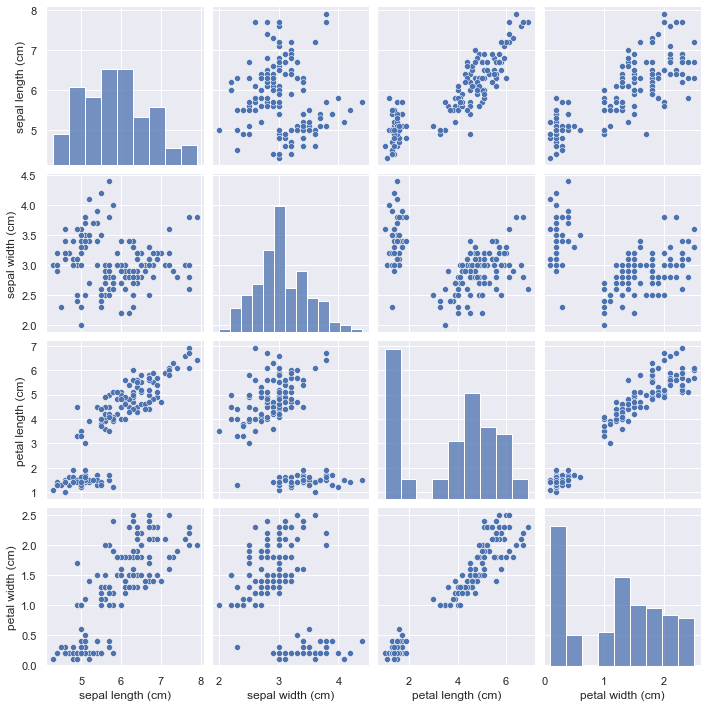

In [14]:
# using scatter plot to see the general overview and outliers:
import seaborn as sns
sns.set()

sns.pairplot(pd.DataFrame(iris.data, columns=iris.feature_names))

KNNeighbors -  there are two important parameters to the KNeighbors classifier: 

1) the number of neighbors

2) how you measure distance between data points (by default Euclidean distance is used)

important preprocessing

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# before making the split function shuffles the dataset using a pseudorandom number generator
X_train, X_test, y_train, y_test= train_test_split(iris.data, iris.target, random_state=0)
model=KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [24]:
# evaluate model accuracy:
acc=model.score(X_test, y_test)
# another way: acc=np.mean(predictions==y_test)
acc # = 0.97 -> 97% of the flowers in the test set were predicted correctly

0.9736842105263158

The more complex we allow our model to be, the better we will be able to predict on the training data. However, if our model 
becomes too complex, we start focusing too much on each individual data point in our training set, 
and the model will not generalize well to new data.

the larger variety of data points your dataset contains, the more complex a model you can use without overfitting.
However, simply duplicating the same data points or collecting very similar data will not help.

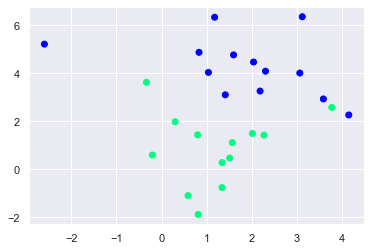

In [35]:
# *********************************************SUPERVISED LEARNING**************************************************************

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=26, centers=2, cluster_std=1.4, random_state=0)
plt.scatter(X[:,0], X[:, 1], c=y, cmap='winter')



In [41]:
# CLASSIFICATION - CANCER MALIGNANT OR BENIGN: 

from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
cancer.keys()
cancer.target_names
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [54]:
# how many samples contain each group

import numpy as np

x=zip(cancer.target_names,np.bincount(cancer.target))
list(x)

[('malignant', 212), ('benign', 357)]

In [76]:
# or:
import pandas as pd

df=pd.DataFrame(cancer.data, columns=cancer.feature_names)
df=pd.concat([df, pd.Series(cancer.target)], axis=1).rename(columns={0:'target'})
df.groupby('target')['target'].count()

target
0    212
1    357
Name: target, dtype: int64

In [131]:
# KNN - after training the dataset, for each test point there are extracted the closest neighbors 
# (its number id provided as a parameter) for each test point, we count how many neighbors belong to class 0 and 
# how many neighbors belong to class 1.  We then assign the class that is more frequent: 
# in other words, the majority class among the k-nearest neighbors
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(cancer.data, cancer.target, random_state=0)


In [132]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
predictions=model.predict(X_test)

acc= model.score(X_test, y_test)
acc

0.9230769230769231

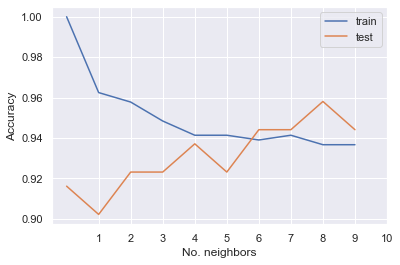

In [161]:
# comparing multiple neighbor numbers:
import seaborn as sns
sns.set()

neighbors=np.arange(1,11)
acc_test=np.empty(len(neighbors))
acc_train=np.empty(len(neighbors))

for i, j in enumerate(neighbors):
    model=KNeighborsClassifier(n_neighbors=j)
    model.fit(X_train, y_train)
    model.predict(X_test)
    acc_train[i]=model.score(X_train, y_train)
    acc_test[i]=model.score(X_test, y_test)

plt.plot(acc_train, label='train')
plt.plot(acc_test, label='test')
plt.xlabel('No. neighbors')
plt.ylabel('Accuracy')
plt.gca().set_xticks(neighbors)
plt.legend()

# Considering a single nearest neighbor, the prediction on the training set is perfect;
# using the single nearest neighbor leads to a model that is toocomplex. On the other hand, when considering 10 neighbors, 
# the model is too simple and performance is even worse.

REGRESSION  Regression is a statistical method  that attempts to determine the strength and character of the relationship between one dependent variable (usually denoted by Y) and a series of other variables (known as independent variables).

x[0]->x[p] - denotes the features of a single data point
a and b - are parameters of the model that are learned,


- simple linear regression : uses one independent variable 'x' (one feature) to explain or predict the outcome of the dependent variable 'Y'
    y=ax +b

- multiple linear regression : uses two or more independent variables 'x' (multiple features) to predict the outcome of the dependent variable 'Y'

    y= a[0] * x[0] + a[1] * x[1] + ... + a[p] * x[p] + b

- non-linear regression methods : when data shows a curvy trend, are a relationship between independent variables ùë• and a dependent variable ùë¶ which result in a non-linear function modeled data. Essentially any relationship that is not linear can be termed as non-linear and is usually represented by the polynomial of ùëò degrees (maximum power of ùë•).

    ùë¶ =ùëéx¬≥ +ùëèùë•¬≤+ùëêùë•+ùëë
    
   

LINEAR REGRESSION = ORDINARY LEAST SQUARES (OLS),

Linear regression finds the parameters 'a' and 'b' that minimize the MEAN SQUARED ERROR between predictions and the true regression targets, y, on the training set.

The coefficients of the model are found via an optimization process that seeks to minimize the sum squared error between the predictions (yhat) and the expected target values (y).

MSE - is the sum of the squared differences between the predictions and the true values, divided by the number of samples.

a = slope = model.coef_ = is a NumPy array with one entry per input feature

b = intercept = model.intercept_ = is always a single float number

underscore at the end - scikit-learn always stores anything that is derived from the training data in attributes that end with a trailing underscore.


A problem with linear regression is that estimated coefficients of the model can become large, making the model sensitive to inputs and possibly unstable. One approach to addressing the stability of regression models is to change the loss function to include additional costs. Linear regression models that use these MODIFIED LOSS FUNCTIONS during training = penalized linear regression (RIDGE - L2 OR LASSO - L1).


LINEAR MODELS - POWERFUL FOR THE HIGH DIMENSIONAL DATASETS:

- fast to train, fast to predict

- if your dataset has highly correlated features the coefficients might be hard to interpret

- Linear models often perform well when the number of features is large compared to the number of samples.

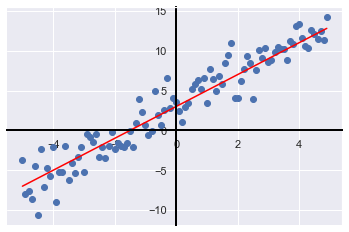

In [311]:
# SIMPLE LINEAR REGRESSION - EXAMPLE:
rng=np.random.RandomState(1)

x=np.arange(-5,5,0.1) # 100 items array
y=2*x +3

y_noise=2 * rng.normal(size=x.size)
y_data = y+y_noise

plt.scatter(x,y_data)
plt.plot(x, y, color='red')

plt.gca().spines['left'].set_color('black')
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['left'].set_position(('data', 0))
plt.gca().spines['bottom'].set_position('zero')
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['bottom'].set_color('black')

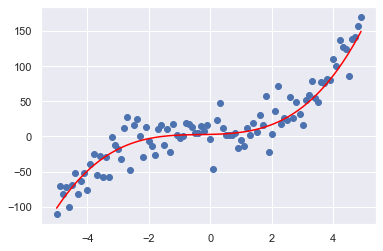

In [275]:
# NON-LINEAR REGRESSION:
y=1*(x**3) + 1*(x**2)+1*(x)+3 # 1D array 100 items
y_noise=20*rng.normal(size=x.size)
y_data=y+y_noise   # 1D array 100 items

plt.scatter(x, y_data)
plt.plot(x, y, color='red')

In [175]:
# KNN ALGORITHM:
# When using multiple nearest neighbors, the prediction is the average, or mean, of the relevant neighbors

from sklearn.neighbors import KNeighborsRegressor
# model.score returns R2 score = coeafficient of determination (0-1, 0=mean of the model, 1=perfect prediction)

line=np.linspace(-3,3,1000)
line=line[:, np.newaxis]
neighbors=[1,3,9]

# fig, axes = plt.subplots(1,3,figsize=(15,3))

# for i, ax in zip(neighbors, axes):
#     model=KNeighborsRegressor(n_neighbors=i)
#     model.fit(X_train, y_train)
#     ax.plot(line, model.predict(line))
#     ax.set_xlabel('Feature')
#     ax.set_ylabel('Target')


LINEAR MODEL = weighted sum of the input features -> weight=a:

y = ax + b  => one feature

for more features 'a' contains the slopes along each feature axis


There are many different linear models for regression. The difference between these models lies in how the model parameters a and b are learned from the training data, and how model complexity can be controlled.

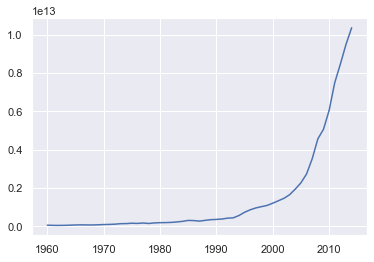

In [294]:
# Example - looking for a non linear model - dataset - annual gross domestic income in US dollars between the years 1960-2014

df=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv', index_col='Year')
plt.plot(df)

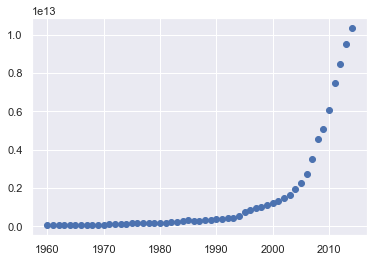

In [298]:
# or without year as an index:
df=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv')
plt.plot(df.Year, df.Value, 'o')  # marker 'o' - default line

# the shape of a value column is similar to the logistic function

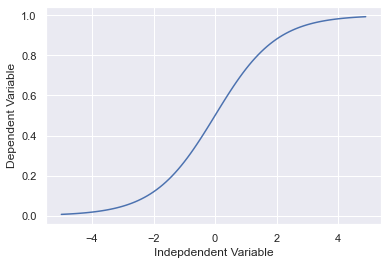

In [310]:
# the shape of above plot is similar to the logistic function:

X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))  # np.exp = exponent e=constant =2.71828183 np.exp([1,2,3])=np.power(2.71828183, [1,2,3])
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [317]:
# LINEAR REGRESSION -BOSTON HOUSE PRICES:
from sklearn.datasets import load_boston

df=load_boston()
df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [319]:
X, y = df.data, df.target
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [325]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model=LinearRegression()
model.fit(X_train, y_train)

print('Accuracy of the training set: ', model.score(X_train, y_train))
print('Accuracy of the test set: ', model.score(X_test, y_test))

# low discrepancy between performance of the training set and the test set is not a sign of overfitting, 
# in case of overfitting we should verify another regression algorithms which allow to control complexity e.g Ridge

Accuracy of the training set:  0.7697699488741149
Accuracy of the test set:  0.6354638433202145


In [335]:
# checking the prediction of the first element from the dataset

X_new = X[0, np.newaxis]
pred=model.predict(X_new)

print(f'The actual value (label) of the first element is {y[0]}, but model predicted: {pred[0]}')

The actual value (label) of the first element is 24.0, but model predicted: 30.460905933879054


RIDGE REGRESSION = L2:

linear model for regression; 

the coefficients (a) are chosen not only so that they predict well on the training data, but also to fit an additional 
constraint = REGULARIZATION.

Regularization means explicitly restricting a model to avoid overfitting. The particular kind used by ridge regression
is known as L2 regularization

RIDGE REGRESSION'S goal is to achieve the magnitude of coefficients to be as small as possible; 
all entries of 'a' should be close to zero. Intuitively, this means each feature should have as little effect on the outcome 
as possible (which translates to having a small slope), while still predicting well

It's less complex model = worse performance on the training set, but better generalization.


ALPHA PARAMETER - DEFAULT=1, determines how much importance the model places on SIMPLICITY versus TRAINING SET PERFORMANCE (worse performance on the training set = better generalization (simpler model))

The optimum setting of alpha depends on the particular dataset we are using.

INCREASING ALPHA = COEFFICIENTS move more TOWARD ZERO (=more restricted model, worse generalization, better training set performance)

If we set alpha too low, however, we again remove the effect of regularization and end up overfitting.

In [337]:
from sklearn.linear_model import Ridge

model_ridge=Ridge()
model_ridge.fit(X_train, y_train)

print(f'Accuracy of the training set: {model_ridge.score(X_train, y_train)}\nAccuracy of the test set: {model_ridge.score(X_test, y_test)}')

Accuracy of the training set: 0.7678858330771393
Accuracy of the test set: 0.6266182204613853


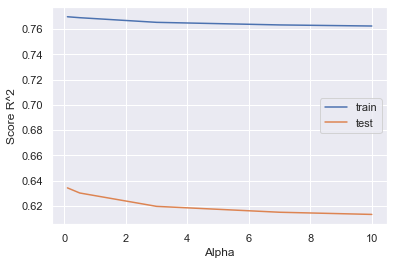

In [340]:
# COMPARING RIDGE ALGORITHM WITH THE DIFFERENT VALUES OF ALPHA PARAMETER:

alpha=[0.1, 0.5, 3, 7, 10]

acc_train=np.empty(len(alpha))
acc_test=np.empty(len(alpha))

for i, j in enumerate(alpha):
    model=Ridge(alpha=j)
    model.fit(X_train, y_train)
    acc_train[i]=model.score(X_train, y_train)
    acc_test[i]=model.score(X_test, y_test)

plt.plot(alpha, acc_train, label='train')
plt.plot(alpha, acc_test, label='test')
plt.xlabel('Alpha')
plt.ylabel('Score R^2')
plt.legend()
# alpha 0.1 seems to provide the best result

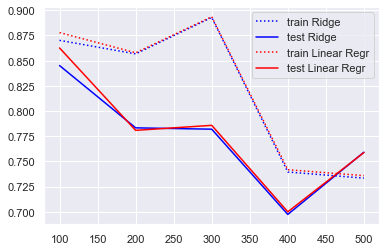

In [357]:
# another way is to manipulate the size of the dataset with fixed alpha parameter:

size=[100,200,300,400,500]

accR_train=np.empty(len(size))
accR_test=np.empty(len(size))
accLR_train=np.empty(len(size))
accLR_test=np.empty(len(size))

for i, j in enumerate(size):
    X1, y1=X[:j], y[:j]
    X1_train, X1_test, y1_train, y1_test=train_test_split(X1, y1, random_state=1)
    modelLR=LinearRegression()
    modelLR.fit(X1_train, y1_train)
    accLR_train[i]=modelLR.score(X1_train, y1_train)
    accLR_test[i]=modelLR.score(X1_test, y1_test)
    modelR=Ridge(alpha=1)
    modelR.fit(X1_train, y1_train)
    accR_train[i]=modelR.score(X1_train, y1_train)
    accR_test[i]=modelR.score(X1_test, y1_test)    
    
    
plt.plot(size, accR_train, ":", label='train Ridge', color='blue')
plt.plot(size, accR_test, label='test Ridge', color='blue')
plt.plot(size, accLR_train, ":", label='train Linear Regr', color='red')
plt.plot(size, accLR_test, label='test Linear Regr', color='red')
plt.legend()

# with enough training data, regularization becomes less important, and given enough data, ridge and linear regression will 
# have the same (similar) performance.

LASSO = L1, 

- like Ridge, restricts coefficients to be close to zero - in a quite different way: when using the lasso, some coefficients are exactly zero = some features are entirely ignored by the model (model becames easier to interpret and can reveal the most important features)

- ALPHA PARAMETER - DEFAULT=1, controls how strongly coefficients are pushed toward zero, 
    
    REDUCE OVERFITTING = DECREASE ALPHA -> ALSO THE MAX_ITER PARAMETER HAS TO BE INCREASED (the maximum number of iterations to run)
    
    
    If we set alpha too low, however, we again remove the effect of regularization and end up overfitting.
    
In practice, ridge regression is usually the first choice between these two models.
However, if you have a large amount of features and expect only a few of them to be important, Lasso might be a better choice.

In [363]:
from sklearn.linear_model import Lasso

model=Lasso()
model.fit(X_train, y_train)

print(f'Training set score: {model.score(X_train, y_train)}\nTest set score: {model.score(X_test, y_test)}\n\
Total number of features: {X_train.shape[1]}\nNumber of features taken into consideration by the model: {np.sum(model.coef_!=0)}')

Training set score: 0.715049987433698
Test set score: 0.5516247059049908
Total number of features: 13
Number of features taken into consideration by the model: 11


In [364]:
# model results with lower alpha parameter and higher max_iter:

model001=Lasso(alpha=0.01, max_iter=100000)
model001.fit(X_train, y_train)

print(f'Training set score: {model001.score(X_train, y_train)}\nTest set score: {model001.score(X_test, y_test)}\n\
Total number of features: {X_train.shape[1]}\nNumber of features taken into consideration by the model: {np.sum(model001.coef_!=0)}')

Training set score: 0.7693295893976123
Test set score: 0.6316839365596244
Total number of features: 13
Number of features taken into consideration by the model: 13


In [370]:
# setting alpha parameter too low - ends up with overfitting:
model00001=Lasso(alpha=0.0001, max_iter=100000)
model00001.fit(X_train, y_train)

print(f'Training set score: {model00001.score(X_train, y_train)}\nTest set score: {model00001.score(X_test, y_test)}\n\
Total number of features: {X_train.shape[1]}\nNumber of features taken into consideration by the model: {np.sum(model00001.coef_!=0)}')

Training set score: 0.7697699048248853
Test set score: 0.6354315853708357
Total number of features: 13
Number of features taken into consideration by the model: 13


ELASTIC NET:

is a popular type of regularized linear regression that combines two popular penalties, specifically the L1 and L2 penalty functions.

elastic_net_penalty = (alpha * l1_penalty) + ((1 ‚Äì alpha) * l2_penalty)

ALPHA of 0.5 would provide a 50% contribution of each penalty to the loss function. An alpha value of 0 gives all weight to the L2 penalty and a value of 1 gives all weight to the L1 penalty.

Another hyperparameter is provided called LAMBDA that controls the weighting of the sum of both penalties to the loss function. A default value of 1.0 is used to use the fully weighted penalty; a value of 0 excludes the penalty.

Confusingly, the alpha hyperparameter can be set via the ‚Äúl1_ratio‚Äù argument that controls the contribution of the L1 and L2 penalties and the lambda hyperparameter can be set via the ‚Äúalpha‚Äù argument that controls the contribution of the sum of both penalties to the loss function.

In [372]:
from sklearn.linear_model import ElasticNet

modelEN=ElasticNet(alpha=1, l1_ratio=0.5)
modelEN.fit(X_train, y_train)


print(f'Training set score: {modelEN.score(X_train, y_train)}\nTest set score: {modelEN.score(X_test, y_test)}')

Training set score: 0.7208704087353837
Test set score: 0.5603163143661134


In [386]:
# testing different configurations of the alpha and l1 parameters - manually or automatically using built in ElasticNetCV:
# By default, the model will test 100 alpha values and use a default ratio. We can specify our own lists of values.

from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# ratios = np.arange(0, 1, 0.01)
# alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
# modelENC = ElasticNetCV(alphas=alphas, l1_ratio=ratios, cv=cv, n_jobs=-1)
modelENC = ElasticNetCV(cv=cv, n_jobs=-1)

modelENC.fit(X, y)

print('alpha: %f' % modelENC.alpha_)
print('l1_ratio_: %f' % modelENC.l1_ratio_)

alpha: 1.449641
l1_ratio_: 0.500000


LINEAR MODELS FOR CLASSIFICATION:

algorithms:

- logistic regression - is a classification algorithm and not a regression algorithm
- SVM


By default, both models apply an L2 regularization, in the same way that Ridge does for regression;

C - the parameter that determines the strength of the regularization = higher values of C correspond to less regularization (high value for the parameter C try to fit the training set as best as possible = overfitting)


In [392]:
# logistic regression - cancer dataset:

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

cancer= load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

model=LogisticRegression() # default C=1
model.fit(X_train, y_train)

print(f'Training set score: {model.score(X_train, y_train)}\nTest set score: {model.score(X_test, y_test)}')

# training and test set performance are very close, it is likely that there is an underfitting 

Training set score: 0.9553990610328639
Test set score: 0.958041958041958


C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [393]:
# comparing different values of the C parameter:
model100=LogisticRegression(C=100).fit(X_train, y_train)

print(f'Training set score: {model100.score(X_train, y_train)}\nTest set score: {model100.score(X_test, y_test)}')

Training set score: 0.9436619718309859
Test set score: 0.958041958041958


C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [394]:
model001=LogisticRegression(C=0.01).fit(X_train, y_train)

print(f'Training set score: {model001.score(X_train, y_train)}\nTest set score: {model001.score(X_test, y_test)}')

Training set score: 0.9366197183098591
Test set score: 0.9300699300699301


C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [398]:
# in LogisticRegression as a default penalty is taken L2 Ridge algorithm, verifying above C values with L1 Lasso:

C=np.array([0.01, 1.0, 100])

acc_train=np.empty(len(C))
acc_test=np.empty(len(C))

for i, j in enumerate(C):
    model=LogisticRegression(C=j, penalty="l1", solver='liblinear')
    model.fit(X_train, y_train)
    acc_train[i]=model.score(X_train, y_train)
    acc_test[i]=model.score(X_test, y_test)
    
for m, n in enumerate(C):
    print(f'Training set score for C = {n}: {acc_train[m]}')
    print(f'Test set score for C = {n}: {acc_test[m]}')

C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training set score for C = 0.01: 0.9178403755868545
Test set score for C = 0.01: 0.9300699300699301
Training set score for C = 1.0: 0.960093896713615
Test set score for C = 1.0: 0.958041958041958
Training set score for C = 100.0: 0.9859154929577465
Test set score for C = 100.0: 0.9790209790209791


LINEAR MODELS FOR MULTICLASS CLASSIFICATION:

Many linear classification models are for binary classification only, and don‚Äôt extend naturally to the multiclass case (with the exception of logistic regression). A common technique to extend a binary classification algorithm to a multiclass classification algorithm is the one-vs.-rest approach.

In the one-vs.-rest approach, a binary model is learned for each class that tries to separate that class from all of the other classes, resulting in as many binary models as there are classes. To make a prediction, all binary classifiers are run on a test point. The classifier that has the highest score on its single class ‚Äúwins,‚Äù and this class label is returned as the prediction.

Having one binary classifier per class results in having one vector of coefficients (a) and one intercept (b) for each class. The class for which the result of the classification confidence formula given here is highest is the assigned class label:

a[0] * x[0] + a[1] * x[1] + ... + a[p] * x[p] + b


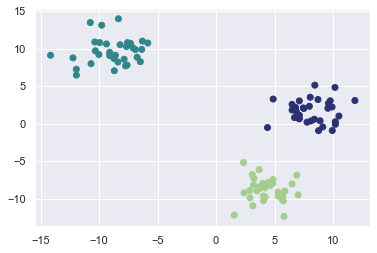

In [408]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=3, cluster_std=1.6)

plt.scatter(X[:,0], X[:,1], c=y, cmap='crest')

In [409]:
from sklearn.svm import LinearSVC

model=LinearSVC()
model.fit(X, y)

print(f'Coefficient shape: {model.coef_.shape}\nIntercept shape: {model.intercept_.shape}')

# the dataset contains 3 classes (3 centers) as y label and 2 features (X shape=100 rows 2 columns)

# coefficient (3,2) -> 3 rows: in each row one class, 2 columns - for each feature
# intercept (3,) -> 1D array - 3 items, storing the intercepts for each class

Coefficient shape: (3, 2)
Intercept shape: (3,)


C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SUMMARY - PARAMETERS : 

- ALPHA - in the REGRESSION MODELS

- C - LinearSVC, LogisticRegression

LARGE ALPHA <-> SMALL C = SIMPLE MODELS

1st decision - choosing appropiate values of alpha and C

2nd decision - choosing regularization: L1 (Lasso) or L2 (Ridge):

If you assume that only a few of your features are actually important, you should use L1. Otherwise, you should default to L2. L1 can also be useful if interpretability of the model is important. As L1 will use only a few features, it is easier to explain which features are important to the model, and what the effects of these features are.

NAIVE BAYES CLASSIFIERS:

faster in training than linear models - The price paid for this efficiency is that naive Bayes models often provide generalization performance that is slightly worse than that of linear classifiers like LogisticRegression and LinearSVC

- GaussianNB - any continuous data; stores the average value as well as the standard deviation of each feature for each class; mostly used on very high-dimensional data
- BernoulliNB - binary data, counts how often every feature of each class is not zero
- MultinomialNB - count data (that is, that each feature represents an integer count of something, like how often a word appears in a sentence); takes into account the average value of each feature for each class, 

ALPHA:

- MultinomialNB and BernoulliNB - MultinomialNB usually performs better than BernoulliNB, particularly on datasets with a relatively large number of nonzero features

- controls model complexity, large alpha results in less model complexity, setting alpha is not critical for good performance


To make a prediction, a data point is compared to the statistics for each of the classes, and the best matching class is predicted.

For both MultinomialNB and BernoulliNB, this leads to a prediction formula that is of the same form as in the linear
models.  coef_ for the naive Bayes models has a different meaning than in the linear models, in that coef_ is not the same as 'a'.

DECISION TREES:
 - REGRESSION AND CLASSIFICATION
 
Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.
Usually data does not come in the form of binary yes/no features as in the animal example, but is instead represented as continuous features - the questions (tests) that are used on continuous data are of the form ‚ÄúIs feature i larger than value a?‚Äù
The algorithm searches over all possible tests and finds the one that is most informative about the target variable.

Alternatively, you can think of each test as splitting the part of the data that is currently being considered along one axis.
The recursive partitioning of the data is repeated until each region in the partition (each leaf in the decision tree) only contains a single target value.

There are two common strategies to prevent overfitting: stopping the creation of the tree early (also called pre-pruning), or building the tree but then removing or collapsing nodes that contain little information (also called post-pruning or just pruning - not implemented in sklearn). Possible criteria for pre-pruning include limiting the maximum depth of the tree, limiting the maximum number of leaves, or requiring a minimum number of points in a node to keep splitting it.

In [414]:
# PREPRUNING - CANCER DATASET:

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


cancer=load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

model=DecisionTreeClassifier(random_state=0) #random_state in the tree is used for tie-breaking internally:
model.fit(X_train, y_train)

print(f'Accuracy on training set: {model.score(X_train, y_train)}') # as default all nodes are pure - hence accuracy 100%
print(f'Accuracy on test set: {model.score(X_test, y_test)}')

Accuracy on training set: 1.0
Accuracy on test set: 0.9370629370629371


In [416]:
# applying pre-pruning: Unpruned trees are prone to overfitting and not generalizing well to new data
# - limiting the depth of the tree (max_depth parameter)
modelP=DecisionTreeClassifier(max_depth=4, random_state=0)
modelP.fit(X_train, y_train)

print(f'Accuracy on training set: {modelP.score(X_train, y_train)}')
print(f'Accuracy on test set: {modelP.score(X_test, y_test)}')

Accuracy on training set: 0.9882629107981221
Accuracy on test set: 0.951048951048951


In [434]:
# visualize the tree:
from sklearn.tree import export_graphviz
import cv2
from graphviz import render

export_graphviz(modelP, out_file='tree.dot', class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

# ! dot -Tpng tree.dot -o tree.png

# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png'])

# import pydot

# (graph,) = pydot.graph_from_dot_file('tree.dot')
# graph.write_png('tree.png')

# img = cv2.imread('tree.png')
# plt.figure(figsize = (20, 20))
# plt.imshow(img)


# SAMPLES - the number of samples in each node
# VALUE - the number of samples per class

In [435]:
# DECISION TREE METRIC - feature importance: 0 and 1, where 0 = ‚Äúnot used at all‚Äù and 1 = ‚Äúperfectly predicts the target.‚Äù
# rates how important each feature is for the decision a tree makes.

print(f'Feature importance: {modelP.feature_importances_}')

Feature importance: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


Text(0.5, 0, 'feature importance')

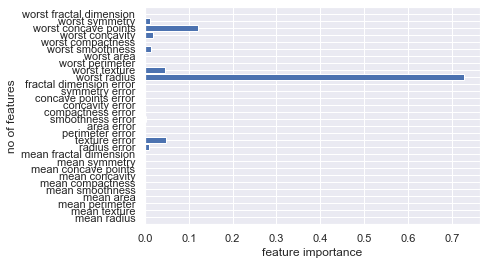

In [439]:
n_features=cancer.data.shape[1]
plt.barh(range(n_features), modelP.feature_importances_, align='center')

plt.yticks(np.arange(n_features), cancer.feature_names)
plt.ylim(-1, n_features)

plt.ylabel('no of features')
plt.xlabel('feature importance')

# ‚Äúworst radius‚Äù is by far the most important feature, but does not tell if sample is benign or malignant

PREPROCESSING LIKE SCALING OR NORMALIZATION NO NEEDED:
As each feature is processed separately, and the possible splits of the data don‚Äôt depend on scaling, no preprocessing like normalization or standardization of features is needed for decision tree algorithms.

Decision trees work well when you have features that are on completely different scales, or a mix of binary and continuous
features, the main drawback - tends to overfitting

ENSEMBLES OF DECISION TREES:
Ensembles are methods that combine multiple machine learning models to create more powerful models.

a ) RANDOM FOREST:
two ways in which the trees in a random forest are randomized:

 - by selecting the data points used to build a tree
 - by selecting the features in each split test
 
 
To build a tree, we first take what is called a bootstrap sample of our data. That is, from our n_samples data points, we repeatedly draw an example randomly with replacement (meaning the same sample can be picked multiple times), n_samples times. This will create a dataset that is as big as the original dataset, but some data points will be missing from it (approximately one third), and some will be repeated.

In each node the algorithm randomly selects a subset of the features, and it looks for the best possible test involving one of these features. The number of features that are selected is controlled by the max_features parameter. This selection of a subset of features is repeated separately in each node, so that each node in a tree can make a decision using a different subset of the features.

Because of the selection of features in each node, each split in each tree operates on a different subset of features. Together, these two mechanisms ensure that all the trees in the random forest are different.

PARAMETERS:

- max features: determines how random each tree is, a smaller max_features reduces overfitting good rule:
    max_features = n_features -> REGRESSION
    max_features=sqrt(n_features) -> CLASSIFICATION

-  if max_features=n_features -> each split can look at all features in the dataset, no randomness in case of the feature selection

- high max_feature -> means that the trees in the random forest will be quite similar, and they will be able to fit the data easily


    - n_estimators -> the number of trees in the forest, LARGER is always BETTER - Averaging more trees will yield a more robust ensemble by reducing overfitting

MAKING A PREDICTION:
 - first the prediction is made for evry tree in the forest.

Regresion = the predictions of all trees are averaged

Classification = each algorithm makes a ‚Äúsoft‚Äù prediction, providing a probability for each possible output label; the probabilities predicted by all the trees are averaged, and the class with the highest probability is predicted.

In [445]:
#RANDOM FOREST ON CANCER DATASET:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
model=RandomForestClassifier(n_estimators=100, random_state=0) # n_estimators=no. of trees
model.fit(X_train, y_train)

print(f'Accuracy on training set: {modelP.score(X_train, y_train)}')
print(f'Accuracy on test set: {modelP.score(X_test, y_test)}')

Accuracy on training set: 0.9788732394366197
Accuracy on test set: 0.9790209790209791


In [446]:
model.feature_importances_

array([0.02515433, 0.01563844, 0.05372655, 0.04861645, 0.00769078,
       0.00936994, 0.05539489, 0.10305394, 0.0065771 , 0.00282708,
       0.02921459, 0.00607814, 0.01342868, 0.03420174, 0.00360641,
       0.00432096, 0.00448775, 0.00657502, 0.00460597, 0.00627095,
       0.11657269, 0.01603133, 0.16027724, 0.0634688 , 0.01356448,
       0.01164113, 0.03923725, 0.11711756, 0.01164259, 0.00960721])

Text(0.5, 0, 'feature importance')

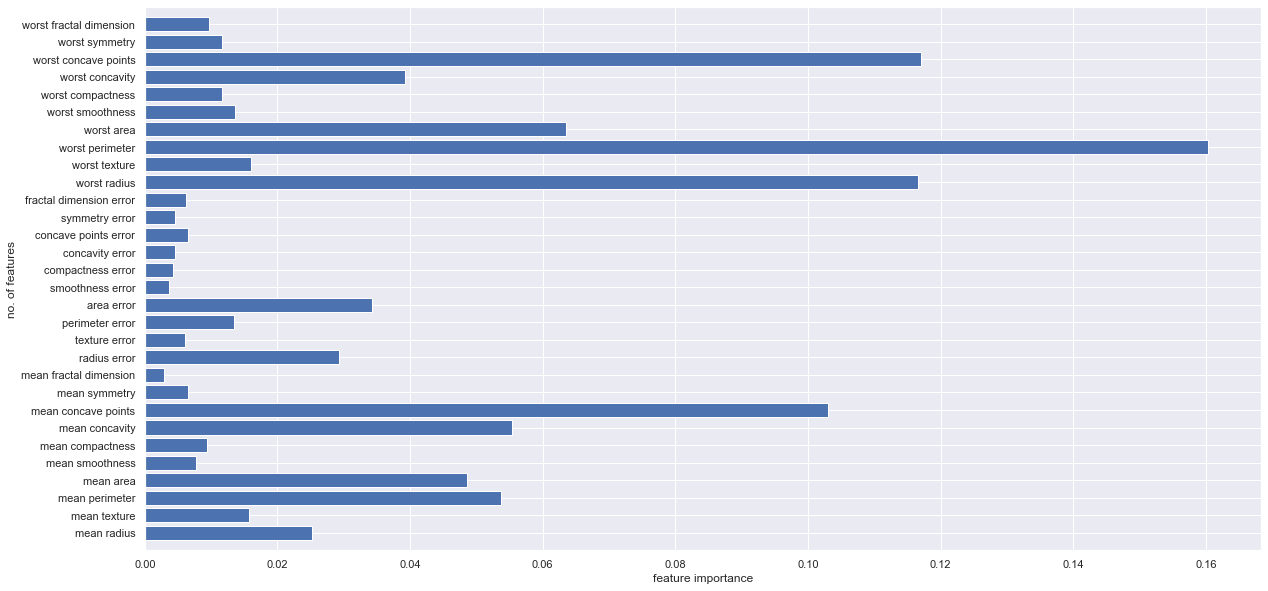

In [452]:
n_features = cancer.data.shape[1]

plt.figure(figsize=(20,10))
plt.barh(range(n_features), model.feature_importances_)

plt.yticks(range(n_features), cancer.feature_names)
plt.ylim(-1, n_features)

plt.ylabel('no. of features')
plt.xlabel('feature importance')
# the random forest gives nonzero importance to many more features than the single tree

b) Gradient boosted regression trees (gradient boosting machines):

- for regression and classification

- trees are built in a serial manner, where each tree tries to correct the mistakes of the previous one

- strong pre_pruning instead of randomization

- combining many simple models - each tree can only provide good predictions on part of the data, and so more and more trees are added to iteratively improve performance.

PARAMETERS:
- learning_rate -> controls how strongly each tree tries to correct the mistakes of the previous trees; HIGHER = stronger corrections = MORE COMPLEX MODEL= higher risk to overfit

- n_estimators - the number of trees in the forest, more trees = more comples model

DEFAULT= 100 trees, max_depth=3, learning_rate=0.1

In [453]:
# gradient boosted classifier on cancer dataset:

from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

model=GradientBoostingClassifier(random_state=0)
model.fit(X_train, y_train)

print(f'Accuracy on training set: {model.score(X_train, y_train)}')
print(f'Accuracy on test set: {model.score(X_test, y_test)}')

Accuracy on training set: 1.0
Accuracy on test set: 0.965034965034965


In [455]:
# Acc on training set 1 = OVERFITTING -> to reduce: stronger prepruning - LIMITING MAX_DEPTH or LOWER THE LEARNING_RATE:

# lower max_depth from default 100 to 1:
modelMD=GradientBoostingClassifier(max_depth=1, random_state=0)
modelMD.fit(X_train,y_train)

print(f'Accuracy on training set: {modelMD.score(X_train, y_train)}')
print(f'Accuracy on test set: {modelMD.score(X_test, y_test)}')

Accuracy on training set: 0.9906103286384976
Accuracy on test set: 0.972027972027972


In [456]:
# lower learning_rate from 0.1 to 0.01

modelLR=GradientBoostingClassifier(learning_rate=0.01)
modelLR.fit(X_train, y_train)

print(f'Accuracy on training set: {modelLR.score(X_train, y_train)}')
print(f'Accuracy on test set: {modelLR.score(X_test, y_test)}')

# limiting the max depth increased model performance significantly, limiting the learning_rate only increased the 
# generalization performance slightly

Accuracy on training set: 0.9882629107981221
Accuracy on test set: 0.958041958041958


In [457]:
# feature importance - max_depth=1

modelMD1=GradientBoostingClassifier(max_depth=1, random_state=0)
modelMD1.fit(X_train, y_train)

modelMD1.feature_importances_

array([0.00000000e+00, 9.07529959e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.32035766e-03, 2.65686907e-01,
       3.49588341e-04, 0.00000000e+00, 0.00000000e+00, 3.00083378e-04,
       0.00000000e+00, 1.45838255e-02, 1.05083243e-03, 0.00000000e+00,
       4.75469106e-03, 0.00000000e+00, 9.56890421e-04, 0.00000000e+00,
       9.23939383e-03, 1.61819935e-02, 3.22495788e-01, 9.24249926e-02,
       6.44041105e-03, 0.00000000e+00, 6.85101108e-03, 2.31450675e-01,
       6.41500790e-03, 3.42225071e-03])

Text(0.5, 0, 'feature importance')

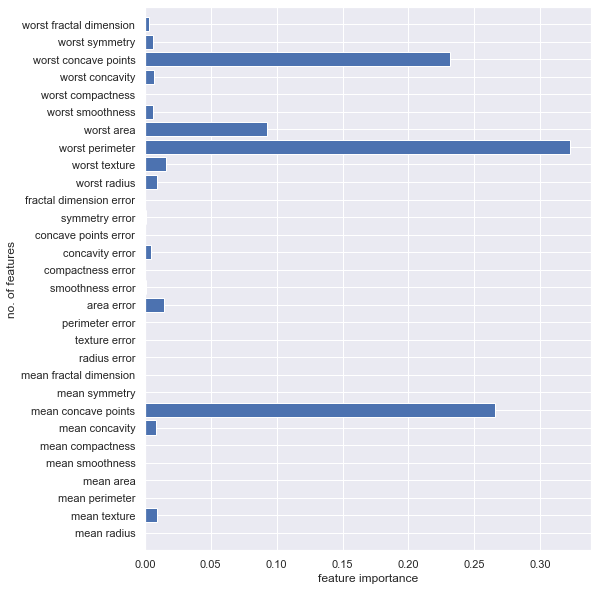

In [466]:
n_features=cancer.data.shape[1]

plt.figure(figsize=(8,10))
plt.barh(range(n_features), modelMD1.feature_importances_)
plt.yticks(range(n_features), cancer.feature_names)
plt.ylim(-1, n_features)

plt.ylabel('no. of features')
plt.xlabel('feature importance')

# GradientBoostingClassifier might completely ignore some features

In contrast to random forests, where a higher n_estimators value is always better, increasing n_estimators in gradient boosting leads to a more complex model, which may lead to overfitting

Kernelized Support Vector Machines

adding nonlinear features to the representation of our data can make linear models much more powerful.

2 ways to map data into higher dimensional space:

 - polynomial kernel
 
 - Radial Basis Function RBF kernel = Gaussian kernel - corresponds to an infinite-dimensional feature space
 

SUPPORT VECTORS = only a subset of the training points matter for defining the decision boundary: the ones that lie on the
border between the classes.

To make a prediction for a new point, the distance to each of the support vectors is measured. A classification decision is made based on the distances to the support vector, and the importance of the support vectors that was learned during training
(stored in the dual_coef_ attribute of SVC).

SVM are very sensitive to the settings of the parameters and to the scaling of the data

PARAMETERS:
- gamma - high value = more complex model = tend to overfitting
- C - measures the strength of the influence of the data points, small C means a very restricted model, where each data point can only have very limited influence.
- By default, C=1 and gamma=1/n_features

In [469]:
# RBF on a cancer dataset:

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

model=SVC() # default C=1, gamma=1/n_features =1/30
model.fit(X_train, y_train)

print(f'Accuracy on training set: {model.score(X_train, y_train)}')
print(f'Accuracy on test set: {model.score(X_test, y_test)}')

Accuracy on training set: 0.903755868544601
Accuracy on test set: 0.9370629370629371


Text(0, 0.5, 'Feature magnitude')

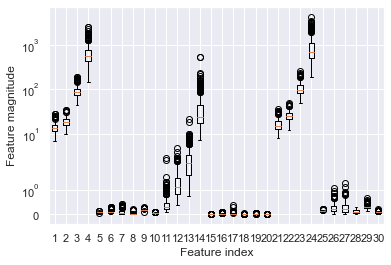

In [475]:
# SVM - very sensitive to the scaling of the data => verifying max/min values using boxplot:
        
plt.boxplot(X_train)
plt.yscale("symlog")
plt.xlabel('Feature index')
plt.ylabel('Feature magnitude')

# completely different orders of magnitude

In [482]:
# PREPROCESSING = SCALING = MinMaxScaller = example step by step:

min_training=X_train.min(axis=0) # without parameter = min val of the whole array, axis=0 min val per feature

# compute the range of each feature axis=0
range_train = (X_train-min_training).max(axis=0)


X_train_scaled = (X_train - min_training) / range_train

# the same transformation for the test set:
X_test_scaled = (X_test - min_training) / range_train

print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [484]:
modelS=SVC()
modelS.fit(X_train_scaled, y_train)

print(f'Accuracy on training set: {modelS.score(X_train_scaled, y_train)}')
print(f'Accuracy on test set: {modelS.score(X_test_scaled, y_test)}')

Accuracy on training set: 0.9835680751173709
Accuracy on test set: 0.972027972027972


In [491]:
# increasing C = more complex model:
modelSC = SVC(C=1000)
modelSC.fit(X_train_scaled, y_train)

print(f'Accuracy on training set: {modelSC.score(X_train_scaled, y_train)}')
print(f'Accuracy on test set: {modelSC.score(X_test_scaled, y_test)}')

Accuracy on training set: 1.0
Accuracy on test set: 0.958041958041958


Neural Networks (Deep Learning):
MLPs = MULTILAYER PERCEPTRONS can be viewed as generalizations of linear models that perform multiple stages of processing to come to a decision.

A non-linear function is applied to the result of the hidden layer - nonlinear function allows the neural network to learn much more complicated functions than a linear model could.

Parameter that needs to be set by the user is the number of nodes in the hidden layer

Weights are set randomly before learning is started, and this random initialization affects the model that is learned. That means that even when using exactly the same parameters, we can obtain very different models when using different random seeds.

sensitive on scaling data

PARAMETERS:

- hidden_layer_sizes => by default 100 - the number of units in a layer, more layers = more complex model

- ALPHA = L2 - controls the complexity of the model, shrink the weights toward zero

- algorithm: 

     'adam' - default, sensitive to the scaling; 

    'lbfgs' 
    
    'sdg'

The most important parameters are the number of layers and the number of hidden units per layer. You should start with one or
two hidden layers, and possibly expand from there. The number of nodes per hidden layer is often similar to the number of input features,

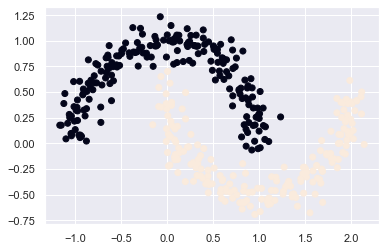

In [516]:
# MLP CLASSIFIER:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=400, random_state=0, noise = 0.1) # makes two interleaving half circles.

plt.scatter(X[:,0], X[:,1], c=y)

In [514]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
model=MLPClassifier(solver='lbfgs', random_state=0)
model.fit(X_train, y_train)

In [519]:
# MLPClassifier on cancer dataset:

from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

# verifying the max value of each feature:
max_val=cancer.data.max(axis=0)
max_val

array([2.811e+01, 3.928e+01, 1.885e+02, 2.501e+03, 1.634e-01, 3.454e-01,
       4.268e-01, 2.012e-01, 3.040e-01, 9.744e-02, 2.873e+00, 4.885e+00,
       2.198e+01, 5.422e+02, 3.113e-02, 1.354e-01, 3.960e-01, 5.279e-02,
       7.895e-02, 2.984e-02, 3.604e+01, 4.954e+01, 2.512e+02, 4.254e+03,
       2.226e-01, 1.058e+00, 1.252e+00, 2.910e-01, 6.638e-01, 2.075e-01])

In [523]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
model=MLPClassifier(random_state=0)
model.fit(X_train, y_train)

print(f'Accuracy on training set: {model.score(X_train, y_train)}')
print(f'Accuracy on test set: {model.score(X_test, y_test)}')

Accuracy on training set: 0.9272300469483568
Accuracy on test set: 0.9300699300699301


In [524]:
# after scaling:

# mean per feature
mean_training=X_train.mean(axis=0)

# std per feature:
std_training=X_train.std(axis=0)

# scaling -> mean=0, std=1
X_scaled=(X_train-mean_training)/std_training

# scaling test set:
T_scaled=(X_test-mean_training)/std_training


modelS=MLPClassifier(random_state=0)
modelS.fit(X_scaled, y_train)

print(f'Accuracy on training set: {modelS.score(X_scaled, y_train)}')
print(f'Accuracy on test set: {modelS.score(T_scaled, y_test)}')

Accuracy on training set: 0.9906103286384976
Accuracy on test set: 0.965034965034965


C:\Users\jkaczmarek\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [528]:
# increasing the number of iterations - default 200 - according to the above error message:
modelMI=MLPClassifier(max_iter=1000, random_state=0)
modelMI.fit(X_scaled, y_train)

print(f'Accuracy on training set: {modelMI.score(X_scaled, y_train)}')
print(f'Accuracy on test set: {modelMI.score(T_scaled, y_test)}')

Accuracy on training set: 1.0
Accuracy on test set: 0.972027972027972


In [529]:
# GAP between training and test sets -  increasing number of iterations only improved the training set
# decreasing model complexity to get better generalization performance - increasing ALPHA parameter:

modelMIA=MLPClassifier(max_iter=1000, random_state=0, alpha=1)
modelMIA.fit(X_scaled, y_train)

print(f'Accuracy on training set: {modelMIA.score(X_scaled, y_train)}')
print(f'Accuracy on test set: {modelMIA.score(T_scaled, y_test)}')

Accuracy on training set: 0.9882629107981221
Accuracy on test set: 0.972027972027972


Uncertainty Estimates from Classifiers

- the ability of classifiers to provide uncertainty estimates of predictions

- two different functions in scikit-learn that can be used to obtain uncertainty estimates from classifiers: 

    decision_function and predict_proba

GradientBoostingClassifier - classifier that has both functions - DECISION_FUNCTION and PREDICT_PROBA


Boosting refers to any Ensemble Method that can combine several weak learners(a predictor with poor accuracy) to make a strong learner(a predictor with high accuracy). The idea behind boosting is to train models sequentially, each trying to correct its predecessor.


Ensemble Method - trains multiple models and aggregate their predictions


a) DECISION_FUNCTION:
    - returns one floating-point number for each sample (= number of rows); this value encodes how strongly the model believes a data point belongs to each class
    - in BINARY CLASSIFICATION - the 'negative class' = negative floating point number is always the first entry of the classes_
attribute
    - in MULTICLASS CLASSIFICATION - each column provides a ‚Äúcertainty score‚Äù for each class, where a large score means that a class is more likely and a small score means the class is less likely; predictions = the maximum entry for each data point


b) PREDICT_PROBA - is always between 0 and 1, the sum of the entries for both classes is always 1:
    - is a probability for each class; in binary classification the first entry in each row is the estimated probability of the first class, and the second entry is the estimated probability of the second class.
    - in multiclassification - the same conditions as in the decision function -  the probabilities for the possible classes for each data point sum to 1
    
    more overfitted model = more certain predictions (even they might be wrong)
    less complex model = unceratin predictions
   

In [545]:
# uncertainty in multiclass classification - Iris dataset:
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier

iris=load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
model = GradientBoostingClassifier(learning_rate=0.1, random_state=0)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [546]:
# DECISION FUNCTION:

print(f'Model classes: {model.classes_ }')# array([0, 1, 2])
print(f'Model shape - n_samples, n_classes: {model.decision_function(X_test).shape}')

model.decision_function(X_test)[:6]

Model classes: [0 1 2]
Model shape - n_samples, n_classes: (38, 3)


array([[-8.0104411 , -6.98527486,  4.81705717],
       [-8.01819888,  3.77312674, -6.87620465],
       [ 6.24999284, -4.29928465, -6.91535309],
       [-8.01043891, -6.98023452,  4.73731973],
       [ 6.24943072, -5.1093528 , -6.91535386],
       [-8.01043891, -6.98002911,  4.73713144]])

In [542]:
# looking for a maximum entry for each data point - large score means that a class is more likely:
#np.argmax - returns the index number of the maximum value in array
 
print(np.argmax(model.decision_function(X_test), axis=1))
print(f'Predictions: {model.predict(X_test)}')

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Predictions: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [556]:
# PREDICT PROBA:
import math

print(model.predict_proba(X_test)[:6])
print(model.predict_proba(X_test)[:6].max(axis=1).round())

[[2.68586307e-06 7.48700134e-06 9.99989827e-01]
 [7.56970160e-06 9.99968714e-01 2.37159514e-05]
 [9.99971873e-01 2.62116756e-05 1.91580233e-06]
 [2.90880070e-06 8.14940771e-06 9.99988942e-01]
 [9.99986417e-01 1.16664063e-05 1.91690594e-06]
 [2.90934842e-06 8.15261667e-06 9.99988938e-01]]
[1. 1. 1. 1. 1. 1.]


In [566]:
print(np.argmax(model.predict_proba(X_test), axis=1))
print(f'Predictions: {model.predict(X_test)}')

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Predictions: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [592]:
pred= model.predict(X_test)
pred=[iris.target_names[j] for j in pred]
y=np.argmax(model.predict_proba(X_test), axis=1)
y= [iris.target_names[i] for i in y]


# comparing which items are common in both lists:
x=[i for i, j in zip(pred, y) if i==j]
print(f'The number of samples is: {np.array(pred).size} - common result for prediction and predict proba: {np.array(x).size}')

The number of samples is: 38 - common result for prediction and predict proba: 38


SUMMARY:

Nearest neighbors

For small datasets, good as a baseline, easy to explain.


Linear models

Go-to as a first algorithm to try, good for very large datasets, good for very highdimensional data.


Naive Bayes

Only for classification. Even faster than linear models, good for very large datasets and high-dimensional data. Often less accurate than linear models.


Decision trees

Very fast, don‚Äôt need scaling of the data, can be visualized and easily explained.


Random forests

Nearly always perform better than a single decision tree, very robust and powerful. Don‚Äôt need scaling of data. Not good for very high-dimensional sparse data.


Gradient boosted decision trees

Often slightly more accurate than random forests. Slower to train but faster to predict than random forests, and smaller in memory. Need more parameter tuning than random forests.


Support vector machines

Powerful for medium-sized datasets of features with similar meaning. Require scaling of data (sensitive to scaling), sensitive to parameters.


Neural networks

Can build very complex models, particularly for large datasets. Sensitive to scaling of the data and to the choice of parameters. Large models need a long time to train.

 *********************************************UNSUPERVISED LEARNING************************************************************

Types:

- transformation of the dataset - create a new representation of the data which might be easier to understand (other algorithms, humans) e.g. DIMNESIONALITY REDUCTION (e.g. reduction to two dimensions for visualisations purposes), finding the parts or components that ‚Äúmake up‚Äù the data (e.g. topic extraction on collection of text documents)

        the main purposes:
        * visualization, 
        * compressing the data, 
        * finding a representation that is more informative for further processing

- CLUSTERING: partition data into distinct groups of similar items, 


    Data does not contain any label information and we don't know the right output - often the results of algorithms are inspected manually
    
    Used as a preprocessing step for supervised algorithms- Learning a new representation of the data can sometimes improve the accuracy of supervised algorithms


PREPROCESSING AND SCALING:

- StandardScaler = for each feature mean = 0, variance = 1; does not ensure any particular minimum and maximum values for the features

- RabustScaler = similar to StandardScaler but uses the median and quartiles, instead of mean and variance

- MinMaxScaler - features between 0-1

- Normalizer - different than above listed, It scales each data point such that the feature vector has a Euclidean length of 1, every data point is scaled by a different number (by the inverse of its length),often used when only the direction (or angle) of the data matters, not the length of the feature vector.


In [593]:
# PREPROCESSING - CANCER DATASET, SVM ALGORITHM:

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [602]:
from sklearn.preprocessing import MinMaxScaler

# FIT APPLIED ONLY TO THE FEATURES FROM TRAINING DATA
scaler=MinMaxScaler()
scaler.fit(X_train) # learning from data
X_train_scaled= scaler.transform(X_train) # actually scale the data

print(f'Shape of the scaled data: {X_train_scaled.shape}\n \
Feature min before scaling: {X_train.min(axis=0)}\n \
Feature max before scaling: {X_train.max(axis=0)}\n \
Feature min after scaling: {X_train_scaled.min(axis=0)}\n \
Feature max after scaling {X_train_scaled.max(axis=0)}')

Shape of the scaled data: (426, 30)
 Feature min before scaling: [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
 Feature max before scaling: [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
 Feature min after scaling: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
 Feature max after scaling [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [604]:
# before model fitting scaling must be applied aslo to the test set:
X_test_scaled = scaler.transform(X_test)

print(f'Feature min after scaling: {X_test_scaled.min(axis=0)}\n \
Feature max after scaling {X_test_scaled.max(axis=0)}')

Feature min after scaling: [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
 Feature max after scaling [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


For the test set some of the results are outside the 0-1 range:

Scalers always applies exactly the same transformation to the training and the test set. This means the transform method always subtracts the training set minimum and divides by the training set range, which might be different from the minimum and range for the test set.

IMPORTANT = FIT METHOD SHOULD BE APPLIED ONLY TO THE X_TRAIN DATASET, applying fit separately to train and test dataset is incorrect

MORE EFFICIENT:

scaler.fit_transform(X_train)

scaler.transform(X_test)

In [612]:
# USING SVM ALGORTITHM - UNSCALED COMPARED TO THE SCALED DATA:

# a) without scaling:

from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
model=SVC(C=100) # C- measures the strength of the influence of the data points

model.fit(X_train, y_train)

print(f'Training accuracy: {model.score(X_train, y_train)} and test accuracy: {model.score(X_test, y_test)}')

Training accuracy: 0.9413145539906104 and test accuracy: 0.9440559440559441


In [620]:
# b) after scaling:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

# scaler.fit(X_train)
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

modelS=SVC(C=100)
modelS.fit(X_train_scaled, y_train)

print(f'Training accuracy: {modelS.score(X_train_scaled, y_train)} and test accuracy: {modelS.score(X_test_scaled, y_test)}')

Training accuracy: 1.0 and test accuracy: 0.965034965034965


In [622]:
# using StandardScaler class:

from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_train_sc=scaler.fit_transform(X_train)
X_test_sc=scaler.transform(X_test)

modelSS=SVC(C=100) #strength of the influence of the data points
modelSS.fit(X_train_sc, y_train)

print(f'Training accuracy: {modelSS.score(X_train_sc, y_train)} and test accuracy: {modelSS.score(X_test_sc, y_test)}')

Training accuracy: 1.0 and test accuracy: 0.958041958041958


TRANSFORMING DATA USING UNSUPERVISED LEARNING:

Some of the popular algorithms:
    
    - PCA - rotates the dataset in a way such that the rotated features are statistically uncorrelated; rotation is often followed by selecting only a subset of the new features, according to how important they are for explaining the data;
    principal components = the directions found by verifying the direction (or vector) in the data that contains most of the information, they are the main directions of variance in the data; there are as many principal components as original features
    - NMF - non negative matrix factorization - used for feature extraction
    - t-SNE

TypeError: 'numpy.ndarray' object is not callable

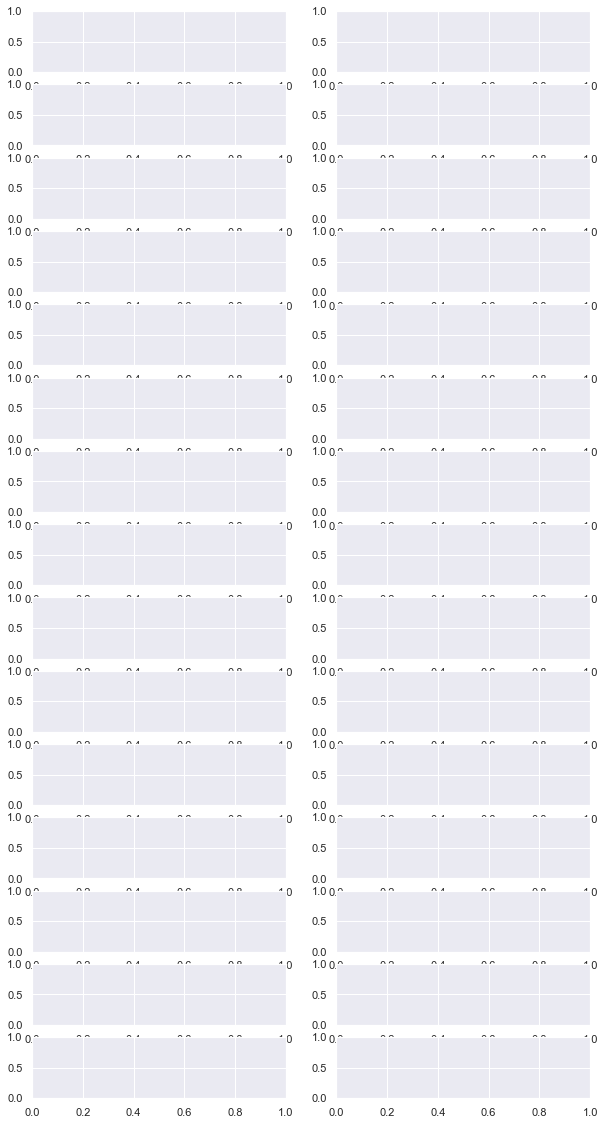

In [644]:
# PCA on the cancer dataset - pairplot might be an alternative but for the lower features number:
from sklearn.datasets import load_breast_cancer
import numpy as np

cancer=load_breast_cancer()

n_features = cancer.data.shape[1]
col=2
row=int(n_features/col)

fig, axes = plt.subplots(row, col, figsize=(10, 20))

for i in range(row):
    for j in range(col):
        axes[i][j]=plt.plot(cancer.data[cancer.feature_names.pop()])

In [636]:
cancer.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

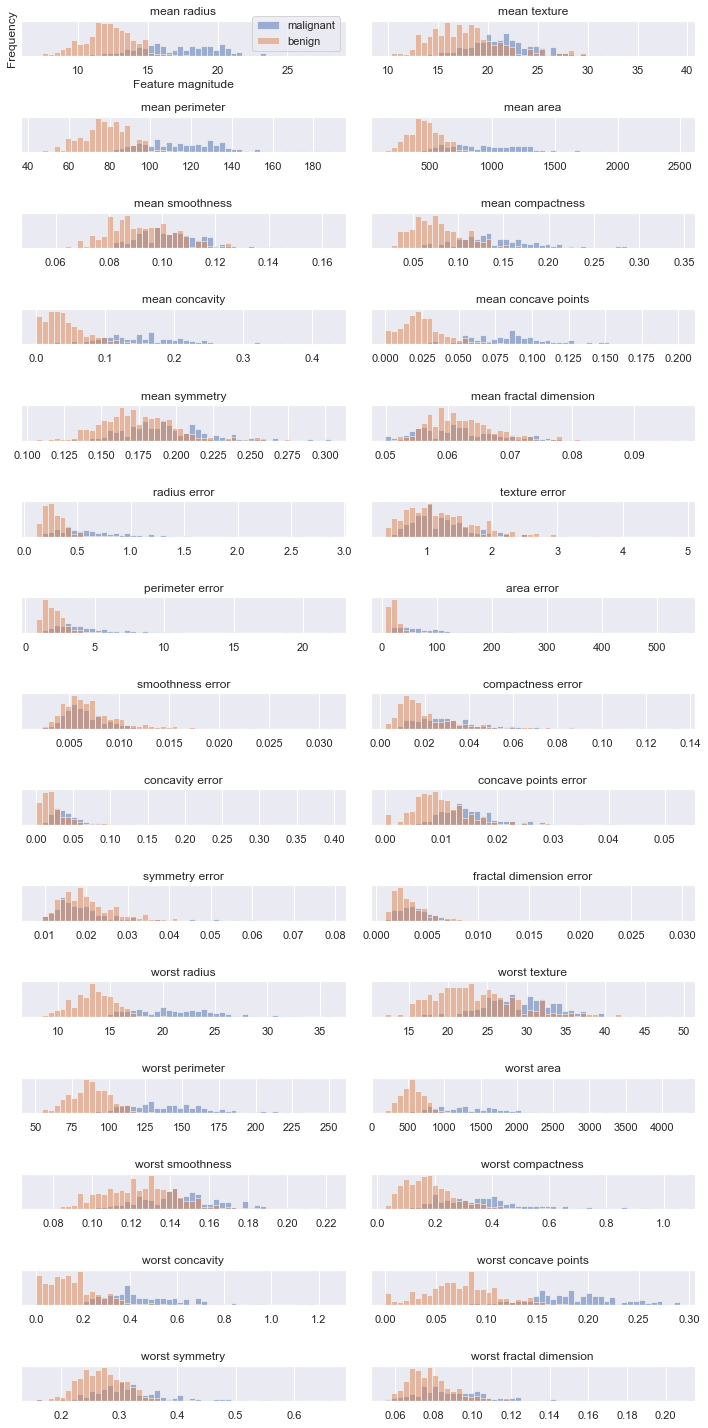

In [629]:
# PCA on the cancer dataset - pairplot might be an alternative but for the lower features number:
from sklearn.datasets import load_breast_cancer
import numpy as np

cancer=load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in np.arange(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

In [633]:
for i in range(3):
    print(i)

TypeError: 'numpy.ndarray' object is not callable